In [202]:
#libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
Un= pd.read_csv(r'C:\Users\olsag\Downloads\Unicorn_Companies.csv')
Un

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [206]:
Un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [55]:
Un.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [207]:
# data wrangling for valuation and funding: M and B to digits
def convert_to_number(x):
    if x[-1]== 'M':
        return float(x[:-1])* 1e6
    elif x[-1]=='B':
        return float(x[:-1])* 1e9
    else:
        return x
# to float
Un['Valuation']= Un['Valuation'].astype(str).str.replace('$','').apply(convert_to_number).astype(float)
Un['Funding']= Un['Funding'].astype(str).str.replace('Unknown','0').str.replace('$','').apply(convert_to_number).astype(float)
Un
Un.head(20)

C:\Users\olsag\AppData\Local\Temp\ipykernel_7476\1156512320.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Un['Valuation']= Un['Valuation'].astype(str).str.replace('$','').apply(convert_to_number).astype(float)
C:\Users\olsag\AppData\Local\Temp\ipykernel_7476\1156512320.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Un['Funding']= Un['Funding'].astype(str).str.replace('Unknown','0').str.replace('$','').apply(convert_to_number).astype(float)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,5.720000e+08,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,4.000000e+10,2019-05-02,Fintech,London,United Kingdom,Europe,2012,2.000000e+09,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,3.900000e+10,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,3.000000e+09,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,3.800000e+10,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,1.400000e+10,Tiger Global Management
9,Databricks,3.800000e+10,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,3.000000e+09,"Andreessen Horowitz, New Enterprise Associates..."


In [208]:
Un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1074 non-null   object 
 1   Valuation         1074 non-null   float64
 2   Date Joined       1074 non-null   object 
 3   Industry          1074 non-null   object 
 4   City              1058 non-null   object 
 5   Country           1074 non-null   object 
 6   Continent         1074 non-null   object 
 7   Year Founded      1074 non-null   int64  
 8   Funding           1074 non-null   float64
 9   Select Investors  1073 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 84.0+ KB


In [211]:
# data wrangling for date joined and year founded
Un['Date Joined']= pd.to_datetime(Un['Date Joined'])
Un['Year Founded']=pd.to_datetime(Un['Year Founded'],format = '%Y')
Un.head(20)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,4.000000e+10,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012-01-01,5.720000e+08,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,4.000000e+10,2019-05-02,Fintech,London,United Kingdom,Europe,2012-01-01,2.000000e+09,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,3.900000e+10,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012-01-01,3.000000e+09,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,3.800000e+10,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015-01-01,1.400000e+10,Tiger Global Management
9,Databricks,3.800000e+10,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013-01-01,3.000000e+09,"Andreessen Horowitz, New Enterprise Associates..."


In [209]:
Un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1074 non-null   object 
 1   Valuation         1074 non-null   float64
 2   Date Joined       1074 non-null   object 
 3   Industry          1074 non-null   object 
 4   City              1058 non-null   object 
 5   Country           1074 non-null   object 
 6   Continent         1074 non-null   object 
 7   Year Founded      1074 non-null   int64  
 8   Funding           1074 non-null   float64
 9   Select Investors  1073 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 84.0+ KB


In [212]:
# Data manipulation : Calculation and adding more column:Age
Un['Age Join']=((Un['Date Joined']-Un['Year Founded']).dt.days/365).round(1)
Un
# interest or Turnover
Un['Interest']=(Un['Valuation']-Un['Funding'])
Un           

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age Join,Interest
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.3,1.720000e+11
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.9,9.300000e+10
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.5,9.800000e+10
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1,9.300000e+10
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9,4.200000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1.000000e+09,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012-01-01,3.790000e+08,"K2 Ventures, Matrix Partners China, IDG Capital",5.5,6.210000e+08
1070,Zhuan Zhuan,1.000000e+09,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015-01-01,9.900000e+08,"58.com, Tencent Holdings",2.3,1.000000e+07
1071,Zihaiguo,1.000000e+09,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018-01-01,8.000000e+07,"Xingwang Investment Management, China Capital ...",3.3,9.200000e+08
1072,Zopa,1.000000e+09,2021-10-19,Fintech,London,United Kingdom,Europe,2005-01-01,7.920000e+08,"IAG Capital Partners, Augmentum Fintech, North...",16.8,2.080000e+08


In [63]:
Un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   datetime64[ns]
 8   Funding           1074 non-null   float64       
 9   Select Investors  1073 non-null   object        
 10  Age Join          1074 non-null   float64       
 11  Interest          1074 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 100.8+ KB


In [67]:
# Missing value(Null)
Un.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Age Join             0
Interest             0
dtype: int64

In [213]:
#city and select investors have the missing value;those missing values needs to be filled up.
Un['City']=Un['City'].ffill()
Un['Select Investors']=Un['Select Investors'].ffill()
Un.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Age Join            0
Interest            0
dtype: int64

In [89]:
Un.tail(20)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age Join,Interest
1054,Vise,1.000000e+09,2021-05-18,Fintech,New York,United States,North America,2016-01-01,128000000.0,"Sequoia Capital, Founders Fund, Bling Capital",5.4,872000000.0
1055,Visier,1.000000e+09,2021-06-29,Internet software & services,Vancouver,Canada,North America,2010-01-01,217000000.0,"Foundation Capital, Summit Partners, Adams Str...",11.5,783000000.0
1056,VOI,1.000000e+09,2021-12-21,Travel,Stockholm,Sweden,Europe,2018-01-01,516000000.0,"Vostok New Ventures, The Raine Group, Balderto...",4.0,484000000.0
1057,Vox Media,1.000000e+09,2015-08-12,Internet software & services,Washington,United States,North America,2011-01-01,308000000.0,"Accel Partners, Comcast Ventures, General Atla...",4.6,692000000.0
1058,VTS,1.000000e+09,2019-05-07,Internet software & services,New York,United States,North America,2012-01-01,187000000.0,"Trinity Ventures, Fifth Wall Ventures, OpenVie...",7.4,813000000.0
1059,Watershed,1.000000e+09,2022-02-08,Internet software & services,San Francisco,United States,North America,2019-01-01,70000000.0,"Kleiner Perkins Caufield & Byers, Sequoia Capital",3.1,930000000.0
1060,Weights & Biases,1.000000e+09,2021-10-13,Internet software & services,San Francisco,United States,North America,2017-01-01,200000000.0,"Coatue Management, Insight Partners, Trinity V...",4.8,800000000.0
1061,WeLab,1.000000e+09,2017-11-08,Fintech,San Francisco,Hong Kong,Asia,2013-01-01,871000000.0,"Sequoia Capital China, ING, Alibaba Entreprene...",4.9,129000000.0
1062,Womai,1.000000e+09,2015-10-12,E-commerce & direct-to-consumer,Beijing,China,Asia,2009-01-01,330000000.0,"SAIF Partners China, Baidu, IDG Capital",6.8,670000000.0
1063,Wrapbook,1.000000e+09,2021-11-10,Fintech,New York,United States,North America,2018-01-01,131000000.0,"Equal Ventures, Uncork Capital, Andreessen Hor...",3.9,869000000.0


# Exploratory Analysis 

 ## No.1 Insight: Top 10 Countries with high numbers of Unicorn companies
 ##Univariate

In [214]:
No_company = Un['Country'].value_counts().sort_values(ascending = False).head(10)
No_company

United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: Country, dtype: int64

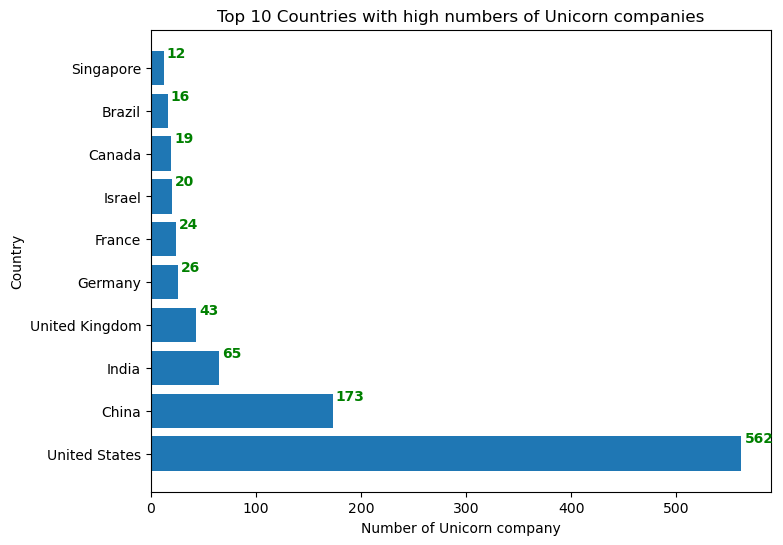

In [215]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a horizontal bar chart
plt.barh(No_company.index, No_company.values)

# Add data labels to the chart
for i, v in enumerate(No_company.values):
    plt.text(v + 3, i + .25, str(v), color='green', fontweight='bold')

# Set the title and axis labels
plt.title('Top 10 Countries with high numbers of Unicorn companies')
plt.xlabel('Number of Unicorn company')
plt.ylabel('Country')

# Display the chart
plt.show()


## Insight 1 observation
The visual analysis for just 10 countreis will higher unicorn company, inferered that United states has the highest number of Unicorn companies of 562

## No 2 insight: Top 5 companies with biggest returns on investment

In [ ]:
## univariate

In [116]:
 Un.tail(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age Join,Interest
1064,Xendit,1.000000e+09,2021-09-14,Fintech,Jakarta,Indonesia,Asia,2014-01-01,215000000.0,"Accel, Y Combinator, Amasia",7.7,785000000.0
1065,XForcePlus,1.000000e+09,2021-06-01,Internet software & services,Shanghai,China,Asia,2015-01-01,200000000.0,"Eastern Bell Capital, Danhua Capital, MSA Capital",6.4,800000000.0
1066,YH Global,1.000000e+09,2017-09-21,"Supply chain, logistics, & delivery",Shenzhen,China,Asia,1997-01-01,182000000.0,"Co-Energy Finance, Grandland",20.7,818000000.0
1067,YipitData,1.000000e+09,2021-12-06,Internet software & services,New York,United States,North America,2008-01-01,492000000.0,"RRE Ventures+, Highland Capital Partners, The ...",13.9,508000000.0
1068,Yunxuetang,1.000000e+09,2021-03-29,Edtech,Suzhou,China,Asia,2011-01-01,389000000.0,"Matrix Partners China, Sequoia Capital China, ...",10.2,611000000.0
1069,Zhaogang,1.000000e+09,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012-01-01,379000000.0,"K2 Ventures, Matrix Partners China, IDG Capital",5.5,621000000.0
1070,Zhuan Zhuan,1.000000e+09,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015-01-01,990000000.0,"58.com, Tencent Holdings",2.3,10000000.0
1071,Zihaiguo,1.000000e+09,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018-01-01,80000000.0,"Xingwang Investment Management, China Capital ...",3.3,920000000.0
1072,Zopa,1.000000e+09,2021-10-19,Fintech,London,United Kingdom,Europe,2005-01-01,792000000.0,"IAG Capital Partners, Augmentum Fintech, North...",16.8,208000000.0
1073,Zwift,1.000000e+09,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014-01-01,620000000.0,"Novator Partners, True, Causeway Media Partners",6.7,380000000.0


In [117]:
H= Un.groupby('Company')['Interest'].sum().sort_values(ascending=False).head(5)
H

Company
Bytedance    1.720000e+11
SHEIN        9.800000e+10
SpaceX       9.300000e+10
Stripe       9.300000e+10
Klarna       4.200000e+10
Name: Interest, dtype: float64

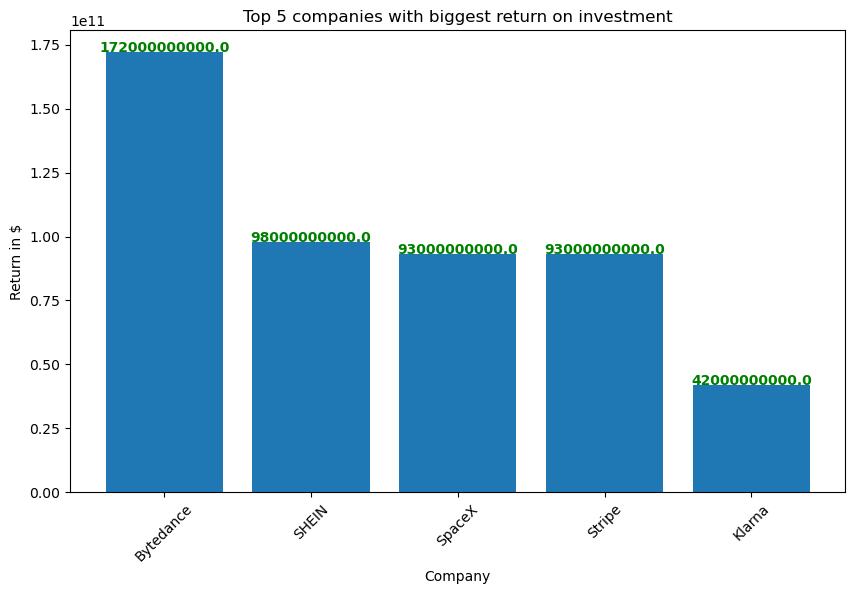

In [122]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
plt.bar(H.index, H.values)

# Add data labels to the chart
for i, v in enumerate(H.values):
    plt.text(i, v + 0.25, str(v), color='green', fontweight='bold', ha='center')

# Set the title and axis labels
plt.title('Top 5 companies with biggest return on investment')
plt.xlabel('Company')
plt.ylabel('Return in $')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the chart
plt.show()


## Insight 2 observation
The analysis shows that Bytedance has the highest return on the Unicorn investment

## No 3 insight: Top 10 companies with Lowest return on investment
Univariate

In [197]:
#Countries with Lowest Revturn
L= Un.groupby('Company')['Interest'].sum().sort_values(ascending=False).tail(10)
L

Company
SumUp              0.000000e+00
SaltPay            0.000000e+00
Momenta            0.000000e+00
OVH                0.000000e+00
Leap Motor         0.000000e+00
Hello TransTech   -1.000000e+09
Fair              -1.000000e+09
REEF Technology   -1.000000e+09
Magic Leap        -1.000000e+09
Snapdeal          -1.000000e+09
Name: Interest, dtype: float64

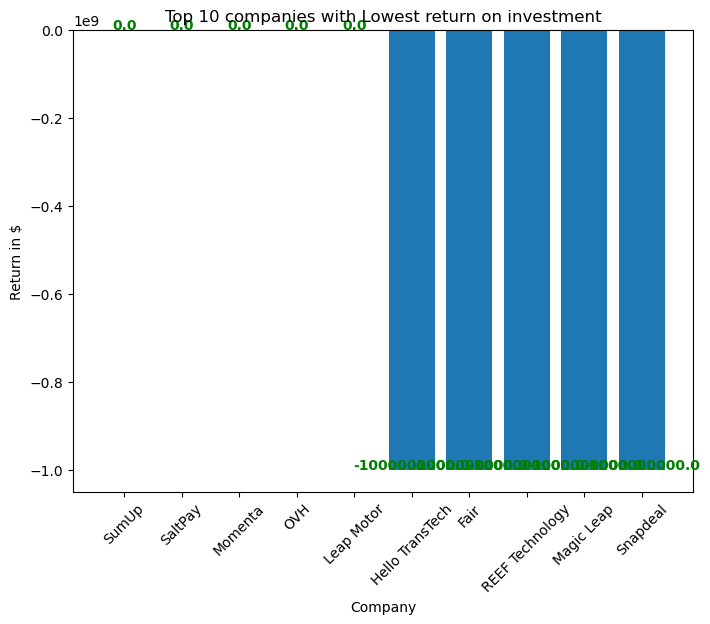

In [200]:
 
plt.figure(figsize=(8, 6))

# Create a horizontal bar chart
plt.bar(L.index, L.values)

# Add data labels to the chart
for i, v in enumerate(L.values):
    plt.text(i, v + 0.25, str(v), color='green', fontweight='bold', ha='center')

# Set the title and axis labels
plt.title('Top 10 companies with Lowest return on investment')
plt.xlabel('Company')
plt.ylabel('Return in $')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the chart
plt.show()


## Insight 3 observation
the analysis revealed the 10 companies with lowest returns.Five (5) companies has no return and no loss while 5 has no return and loss.

## No 4 insight:Top 4 Investors that Funded the Most Unicorn
Bivariate Analysis

In [128]:
IV = Un.groupby('Select Investors')['Funding'].sum().sort_values(ascending=False).head(4)
IV

Select Investors
Tiger Global Management                                                    1.400000e+10
Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group    8.000000e+09
Tencent Holdings, KKR, Smash Ventures                                      7.000000e+09
Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures                7.000000e+09
Name: Funding, dtype: float64

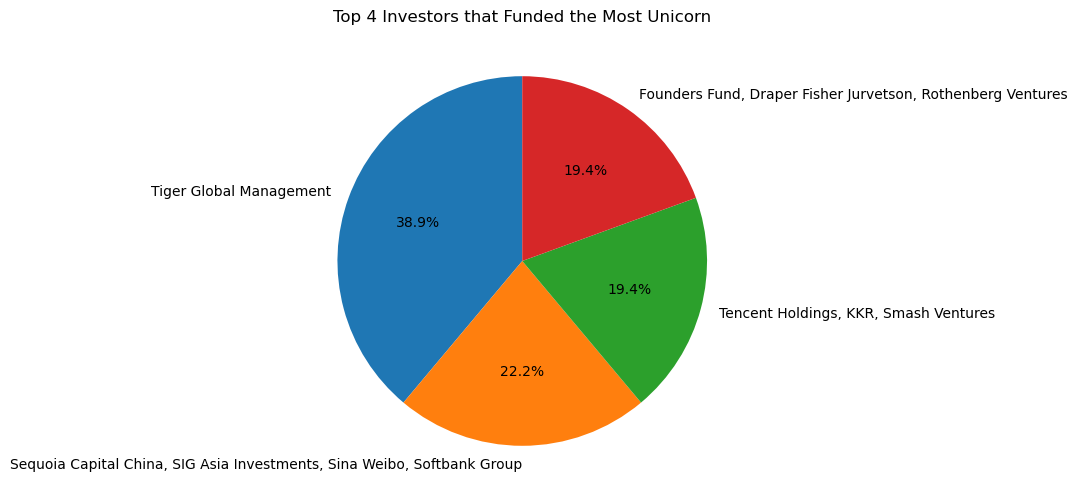

In [130]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie chart
plt.pie(IV.values, labels=IV.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Top 4 Investors that Funded the Most Unicorn')

# Display the chart
plt.show()

## Insight 4 observation
The analysis reveal the Tiger global management as the investors that invest on unicorn most.

## No 5 Insight: Period to become Unicorn company
Bivariate Analysis

In [144]:
Un.groupby('Company')['Age Join'].describe().head(10)

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
1047 Games,1.0,4.7,NaN,4.7,4.7,4.7,4.7,4.7
1KMXC,1.0,7.7,NaN,7.7,7.7,7.7,7.7,7.7
1Password,1.0,16.5,NaN,16.5,16.5,16.5,16.5,16.5
4Paradigm,1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
56PINGTAI,1.0,8.1,NaN,8.1,8.1,8.1,8.1,8.1
58 Daojia,1.0,1.8,NaN,1.8,1.8,1.8,1.8,1.8
6Sense,1.0,8.2,NaN,8.2,8.2,8.2,8.2,8.2
A24 Films,1.0,10.2,NaN,10.2,10.2,10.2,10.2,10.2
ABL Space Systems,1.0,4.2,NaN,4.2,4.2,4.2,4.2,4.2


<Axes: xlabel='Company', ylabel='Age Join'>

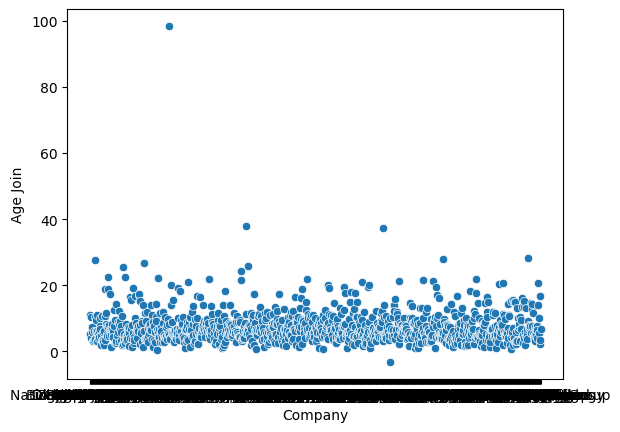

In [157]:
sns.scatterplot(x = 'Company', y = 'Age Join', data = Un)

## Insight 5 observation
The period to attain unicorn member usually falls between 5-10months because the data were clustered around the range.There were just few above 10month. 

## No 6 Insight:The Unicorn companies in Country by city
Multivariate Analysis

In [172]:
No_company = Un.groupby(['Country','City'])['Company'].value_counts().sort_values(ascending = True).head(50)
No_company

Country        City           Company               
Argentina      Buenos Aires   Uala                      1
United States  New York       Away                      1
                              Axonius                   1
                              Better.com                1
                              Betterment                1
                              Beyond Identity           1
                              BigID                     1
                              BlueVoyant                1
                              Bluecore                  1
                              Bowery Farming            1
                              CAIS                      1
                              CHEQ                      1
                              Cadence                   1
                              Capitolis                 1
                              Capsule                   1
                              Cedar                     1
                   

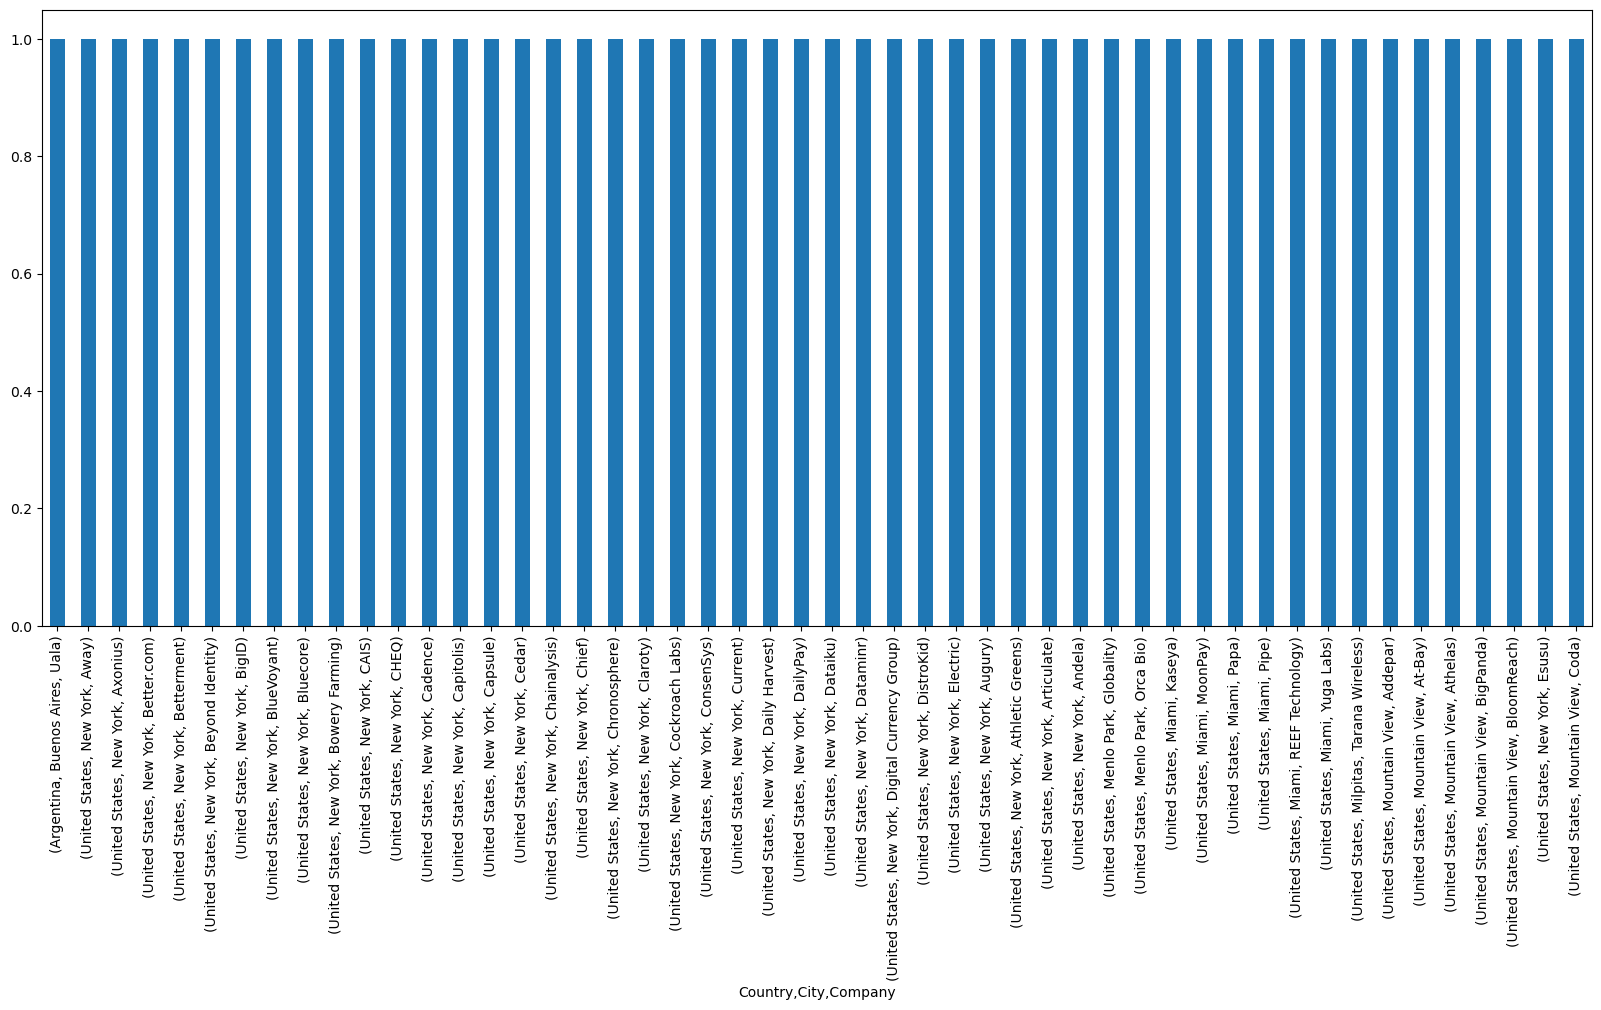

In [169]:
No_company.plot.bar(figsize = (20, 8))
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

## Insight 6 Observation
The New York in United States has more unicorn companies

## No 7 Insight: Top 4 companies by Funding
Bivariate Analysis

In [180]:
##funding by Company
Val = Un.groupby('Company')['Funding'].sum()[4:].sort_values(ascending = False).head(4)
Val

Company
JUUL Labs     1.400000e+10
Bytedance     8.000000e+09
SpaceX        7.000000e+09
Epic Games    7.000000e+09
Name: Funding, dtype: float64

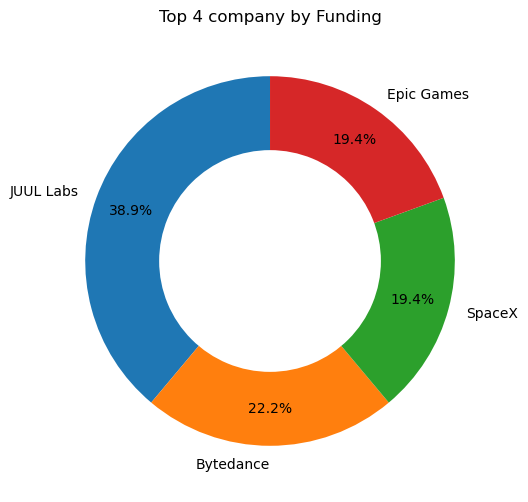

In [181]:
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Create a donut chart
ax.pie(Val.values, labels=Val.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.1)
ax.pie([1], colors=['white'], radius=0.6)

# Add a circle to create a donut chart
circle = plt.Circle((0,0), 0.5, color='white')
ax.add_artist(circle)

# Set the title
plt.title('Top 4 company by Funding')

# Display the chart
plt.show()


## Insight 7 Observation
The JUUL Labs company invested more on the unicorn due to the highest number and percentage of Funding.

## No 8 Insight: Relationship between Funding and Return of Unicorn
Bivariate Analysis

<Axes: xlabel='Funding', ylabel='Interest'>

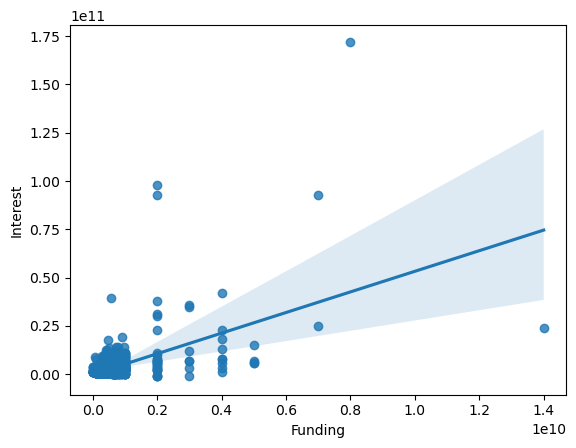

In [182]:
# compare Funding with Returns
sns.regplot(x = 'Funding', y = 'Interest', data = Un)

## Insight 8 observation
The relationship between the Funding and return is linear but weak because most falls below 0.5 and clustered around the origin.
This implies that the higher the funding, the higher the return.

## No 9 insight:Top 4 continent by Funding
Bivariate Analysis

In [191]:
#Top 4 Continent with biggest Funding
Con= Un.groupby('Continent')['Funding'].sum().sort_values(ascending = False).head(4)
Con

Continent
North America    2.930850e+11
Asia             1.940410e+11
Europe           8.753600e+10
South America    1.313300e+10
Name: Funding, dtype: float64

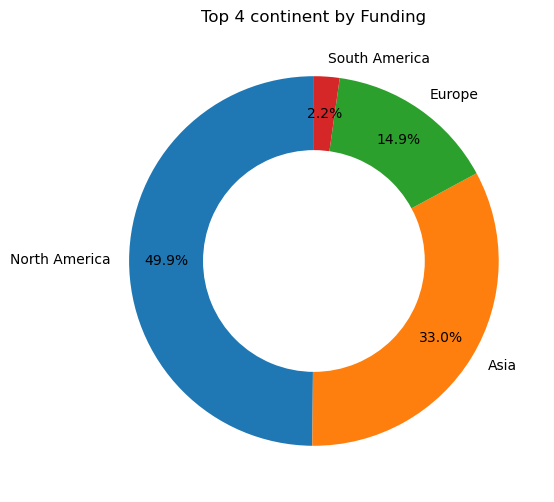

In [192]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a donut chart
ax.pie(Con.values, labels=Con.index, autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.1)
ax.pie([1], colors=['white'], radius=0.6)

# Add a circle to create a donut chart
circle = plt.Circle((0,0), 0.5, color='white')
ax.add_artist(circle)

# Set the title
plt.title('Top 4 continent by Funding')

# Display the chart
plt.show()


## Insight 9 Observation
North America has the highest countries that invested on Unicorn 

## No 10 Insight: Correlation Analysis
Multivariate Analysis

In [217]:
#Multi
NV = Un.describe()
NV

,Valuation,Funding,Age Join,Interest
count,1.074000e+03,1.074000e+03,1074.000000,1.074000e+03
mean,3.455307e+09,5.510428e+08,7.489851,2.904264e+09
std,8.547022e+09,8.077194e+08,5.316578,8.089591e+09
min,1.000000e+09,0.000000e+00,-3.200000,-1.000000e+09
25%,1.000000e+09,2.180000e+08,4.425000,7.745000e+08
50%,2.000000e+09,3.650000e+08,6.500000,1.503500e+09
75%,3.000000e+09,6.030000e+08,9.100000,2.601750e+09
max,1.800000e+11,1.400000e+10,98.500000,1.720000e+11


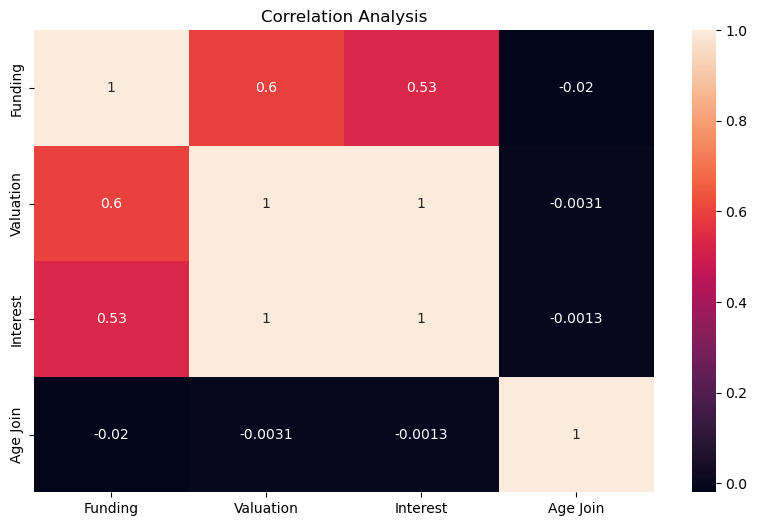

In [223]:
NC = ['Funding', 'Valuation', 'Interest','Age Join']

# calculate the correlation matrix
corr_matrix = Un[NC].corr()

# visualize the correlation matrix with heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Analysis')
plt.show()

## Insight 10 Observation
The relatinship among the Funding,valuation and interest(return) is positive while Age join as weak negative associate.As one increase,the other increase for funding and valuation.

# Recommendations
*The High Funding of the company has relative impact on the investment return,so the funding should be improve,in order to give big returns.
*The period of attaining the Unicorn company should not be much because it has not result on the investment.10months is good to start.
*Other countries apart from united states and China should be motivated to invest more on unicorn companies.
*Unicorn companies with low returns should be monitored and managed properly to improve the company growth.
